In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("../Data/practice_data.tsv",encoding= 'unicode_escape')

In [3]:
df.head()

unique_id    core_id                                       citing_title  \
0       CC1  158977742  Ontology-Based Recommendation of Editorial Pro...   
1       CC2  158977742  Ontology-Based Recommendation of Editorial Pro...   
2       CC3  158977742  Ontology-Based Recommendation of Editorial Pro...   
3       CC4  158977742  Ontology-Based Recommendation of Editorial Pro...   
4       CC5  158977742  Ontology-Based Recommendation of Editorial Pro...   

              citing_author  \
0  Thiviyan Thanapalasingam   
1  Thiviyan Thanapalasingam   
2  Thiviyan Thanapalasingam   
3  Thiviyan Thanapalasingam   
4  Thiviyan Thanapalasingam   

                                         cited_title cited_author  \
0  Web search personalization with ontological us...         Sieg   
1             Exploring Scholarly Data with Rexplore      Osborne   
2  Klink-2: Integrating Multiple Web Sources to G...      Osborne   
3  Forecasting the Spreading of Technologies in R...      Osborne   
4  Supporting Springer Nature Editors by means of...      Osborne   

                                    citation_context  citation_class_label  \
0  They usually generate user models that describ...                     5   
1  The Computer Science Ontology (CSO)[3]is a lar...                     0   
2  In order to do so, we characterized all SN pub...                     0   
3  This API supports a number of applications, in...                     0   
4  It works according to three main steps:1) It r...                     5   

   citation_influence_label  
0                         0  
1                         0  
2                         0  
3                         1  
4                         1

In [4]:
# ROC functions
# roc curve and auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# ROC with single value feature
def roc(X, y, title = "Influence Label"):
    ns_probs = [0 for _ in range(len(y))]
    X = X / max(X)
    ns_auc = roc_auc_score(y, ns_probs)
    lr_auc = roc_auc_score(y, X)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y, X)
    # plot the roc curve for the model
    plt.title(title)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

# ROC with a model (vector feature)
def rocm(X, y):
    # generate 2 class dataset
    X, y = df['citation_rel_loc'].to_numpy().reshape(-1,1), df['citation_influence_label']
    # split into train/test sets
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]
    # fit a model
    model = LogisticRegression(solver='lbfgs')
    model.fit(trainX, trainy)
    # predict probabilities
    lr_probs = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [5]:
def mmroc(X, y):
    for i in range(6):
        y_i = []
        for j in range(len(y)):
            if y.iloc[j] != i:
                y_i.append(0)
            else:
                y_i.append(1)
        title = "Class Label {}".format(i)
        roc(X, y_i, title)

def mmrocm(X, y):
    for i in range(6):
        y_i = []
        for j in range(len(y)):
            if y.iloc[j] != i:
                y_i.append(0)
            else:
                y_i.append(1)
        rocm(X, y_i)

# Relative Location in Citation

In [6]:
df['citation_rel_loc'] = (df['citation_context'].str.index("#AUTHOR_TAG")) / (df['citation_context'].str.len() - 11)

In [7]:
df['citation_rel_loc'].head()

0    1.000000
1    0.994681
2    1.000000
3    0.324324
4    0.706612
Name: citation_rel_loc, dtype: float64

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.480


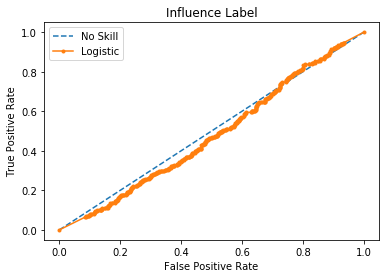

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.515


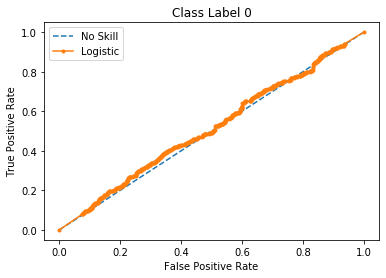

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.445


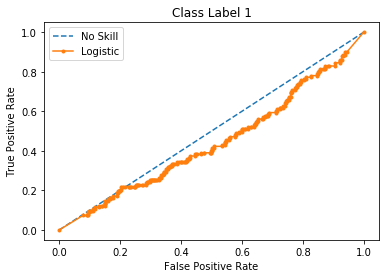

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.490


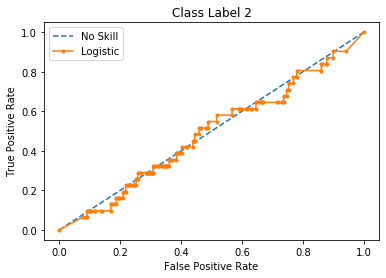

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.559


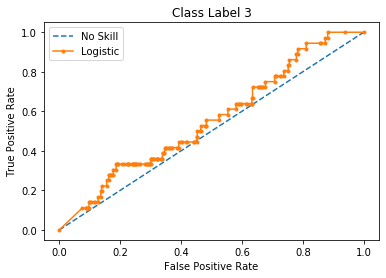

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.445


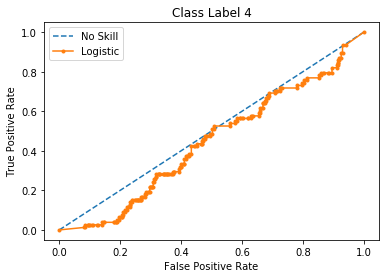

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.531


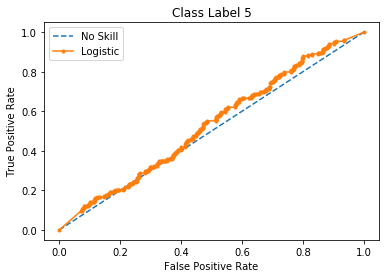

In [8]:
roc(df['citation_rel_loc'], df['citation_influence_label'])
mmroc(df['citation_rel_loc'], df['citation_class_label'])

# Relative location to punctuation

In [9]:
citation_rel_punc = []
for i in range(len(df)):
    text = df['citation_context'].iloc[i]
    ind = text.index('#AUTHOR_TAG')
    val = -1
    start = 0
    end = len(text) - 1
    for j in range(ind, 0, -1):
        if text[j] == ',' or text[j] == '.' or text[j] == ';':
            start = j
            break
    for j in range(ind, len(text)):
        if text[j] == ',' or text[j] == '.' or text[j] == ';':
            end = j
            break
    end -= 10
    val = (ind - start) / (end - start)
    citation_rel_punc.append(val)

df['citation_rel_punc'] = citation_rel_punc

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.507


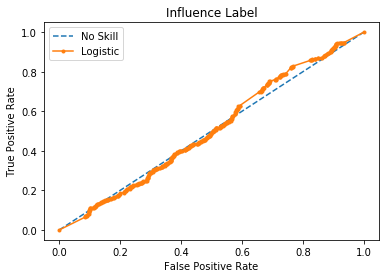

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.508


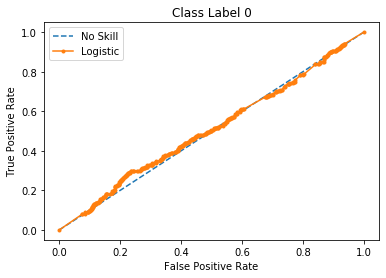

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.468


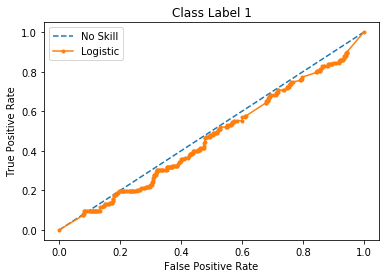

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.463


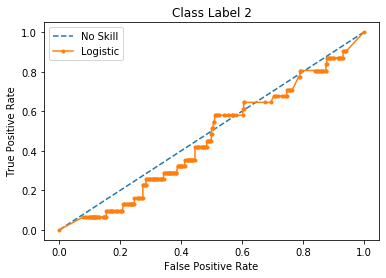

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.569


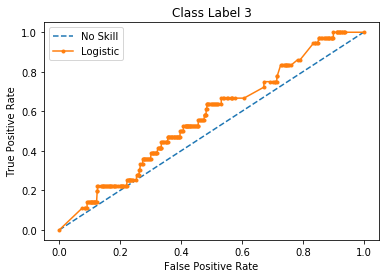

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.429


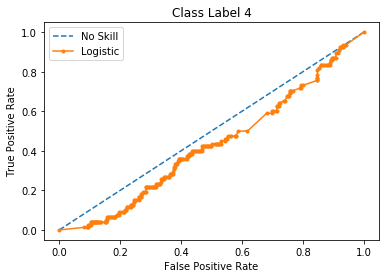

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.536


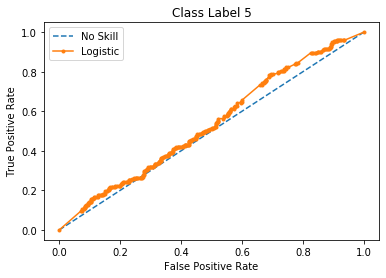

In [10]:
roc(df['citation_rel_punc'], df['citation_influence_label'])
mmroc(df['citation_rel_punc'], df['citation_class_label'])

# Length of citation (words)

In [11]:
df['citation_len'] = df['citation_context'].str.split().str.len() - 1 # -1 for #AUTHOR_TAG

In [12]:
df['citation_len'].head()

0    15
1    26
2    31
3    58
4    37
Name: citation_len, dtype: int64

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.533


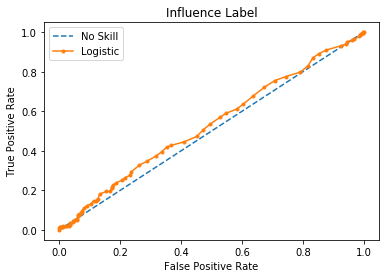

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.560


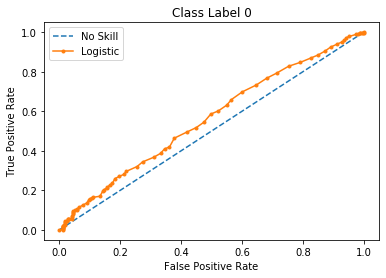

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.433


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.445


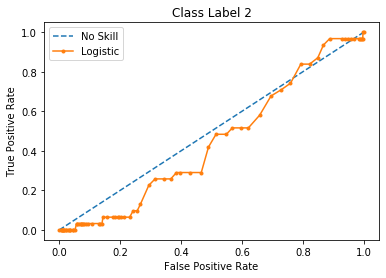

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.496


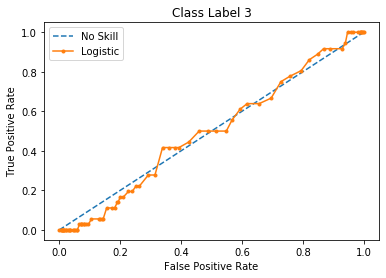

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.481


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.469


In [13]:
roc(df['citation_len'], df['citation_influence_label'])
mmroc(df['citation_len'], df['citation_class_label'])

# Number of citations

In [14]:
df['num_citations'] = df['citation_context'].str.count('\[') - df['citation_context'].str.count('\[#AUTHOR_TAG\]')

In [15]:
df['num_citations'].head()

0    0
1    2
2    0
3    2
4    0
Name: num_citations, dtype: int64

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.488


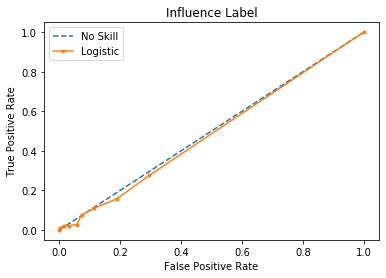

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.493


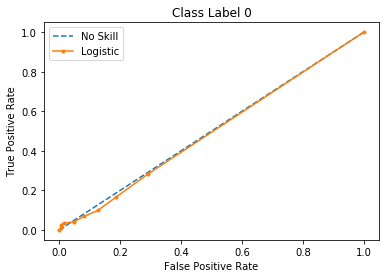

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.537


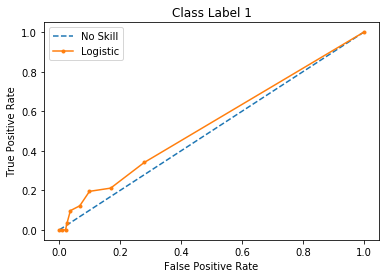

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.541


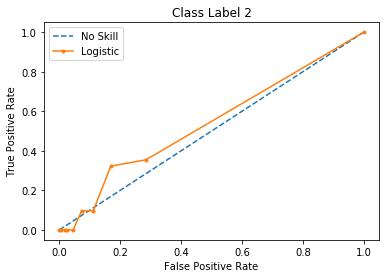

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.507


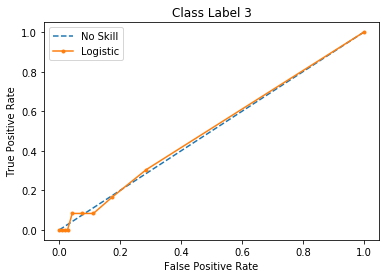

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.442


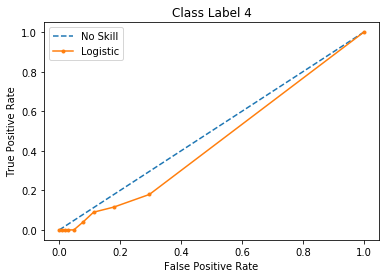

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.503


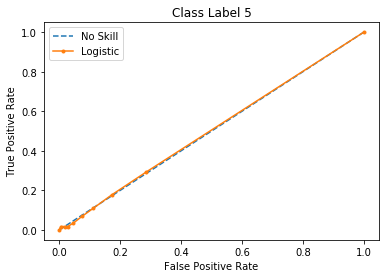

In [16]:
roc(df['num_citations'], df['citation_influence_label'])
mmroc(df['num_citations'], df['citation_class_label'])

# Citation in Parentheses

In [17]:
citation_in_paren = []
for i in range(len(df)):
    text = df['citation_context'].iloc[i]
    ind = text.index('#AUTHOR_TAG')
    flag = 0
    for j in range(ind, len(text)):
        if text[j] == ')':
            for k in range(j, 0, -1):
                if text[k] == '(':
                    if ind > k and ind < j:
                        flag = 1
    citation_in_paren.append(flag)

df['citation_in_paren'] = citation_in_paren

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.501


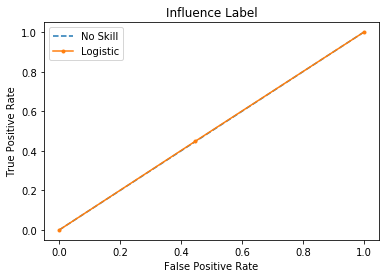

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.568


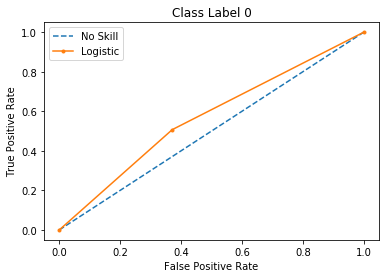

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.407


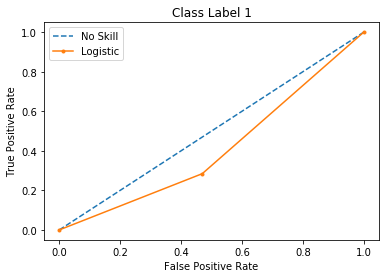

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.469


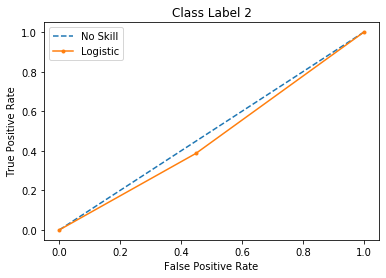

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.499


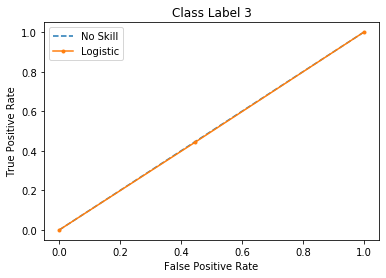

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.508


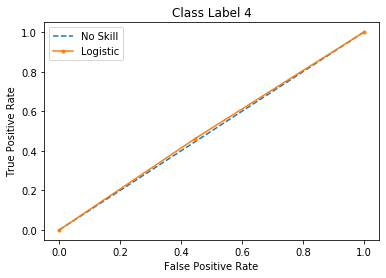

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.456


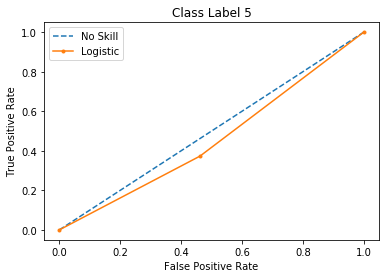

In [18]:
roc(df['citation_in_paren'], df['citation_influence_label'])
mmroc(df['citation_in_paren'], df['citation_class_label'])

# Presence of active verb 
Is the author doing something?

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\angik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [20]:
active_verb = []
for i in range(len(df)):
    text = nltk.word_tokenize(df['citation_context'].iloc[i])
    pos_tagged = nltk.pos_tag(text)
    for s in [y[0] for y in pos_tagged]:
        if 'AUTHOR_TAG' in s:
            index = [y[0] for y in pos_tagged].index(s)
            break
    if index != len(pos_tagged) - 1 and 'VB' in pos_tagged[index + 1][1]:
        active_verb.append(1)
    else:
        active_verb.append(0)
        
df['active_verb'] = active_verb

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.499


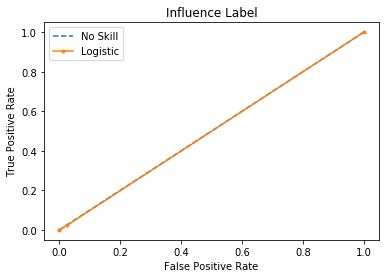

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.503


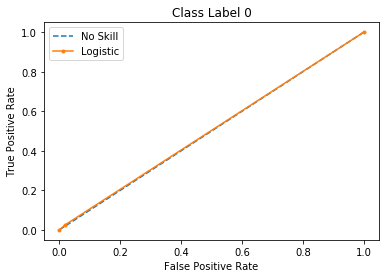

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


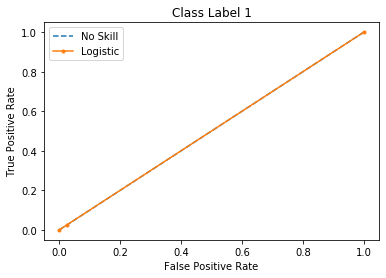

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.504


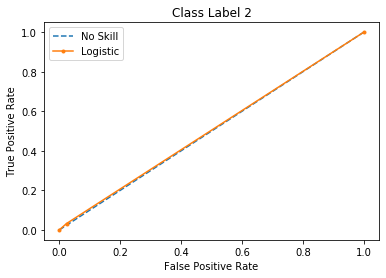

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.488


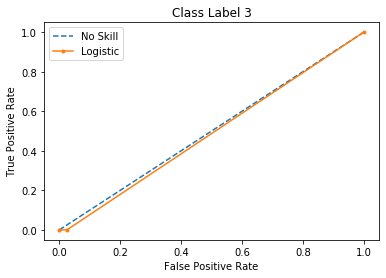

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.494


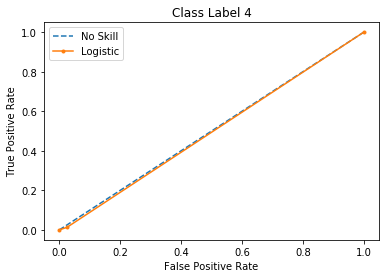

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.499


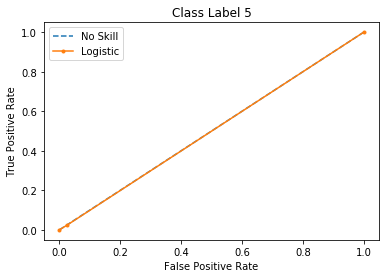

In [21]:
roc(df['active_verb'], df['citation_influence_label'])
mmroc(df['active_verb'], df['citation_class_label'])

# "a" after first comma after citation

In [22]:
desc = []
for i in range(len(df)):
    text = df['citation_context'].iloc[i]
    ind = text.index('#AUTHOR_TAG')
    flag = 0
    for j in range(ind, len(text)):
        if text[j] == ',':
            if text[j + 2] == 'a':
                flag = 1
            break
    desc.append(flag)

df['citation_description'] = desc

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.498


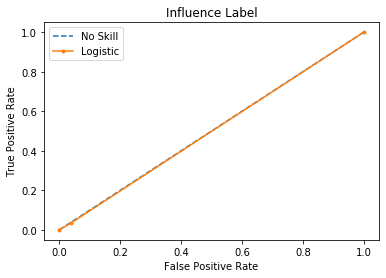

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.486


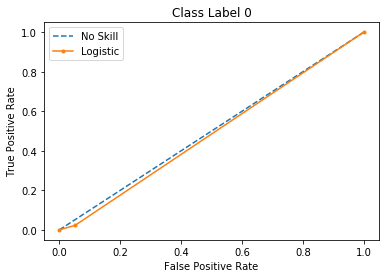

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.530


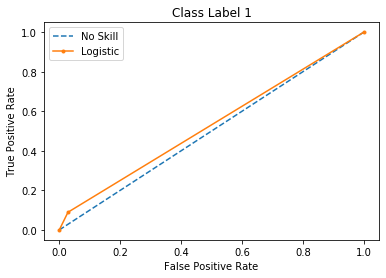

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.481


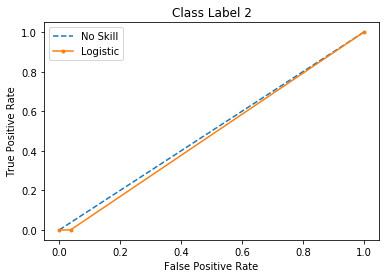

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.510


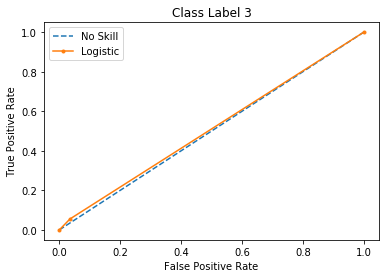

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.529


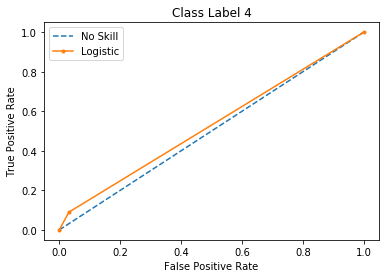

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.489


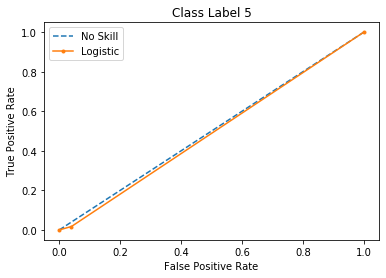

In [23]:
roc(df['citation_description'], df['citation_influence_label'])
mmroc(df['citation_description'], df['citation_class_label'])

In [24]:
desc[:20]

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]